## Optimal pooling

In [1]:
import utils as ut
import optimal_binning as ob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### A. Generate the synthetic dataset

In [2]:
# Generate dataset
generator = ut.SyntheticDatasetGenerator(n_samples=1_000_000)
generator.generate_dataset()
df = generator.fit_logistic_regression()

df.head()

,x1,x2,year,target,score
0,0.958646,0.838719,2020,0,0.194613
1,-0.094752,-0.498360,2019,0,0.005142
2,1.552740,-0.543556,2015,0,0.092111
3,0.093803,-0.791283,2011,0,0.004804
4,0.259901,-0.520167,2010,0,0.009551


### B. Create raw bins for optimisation task

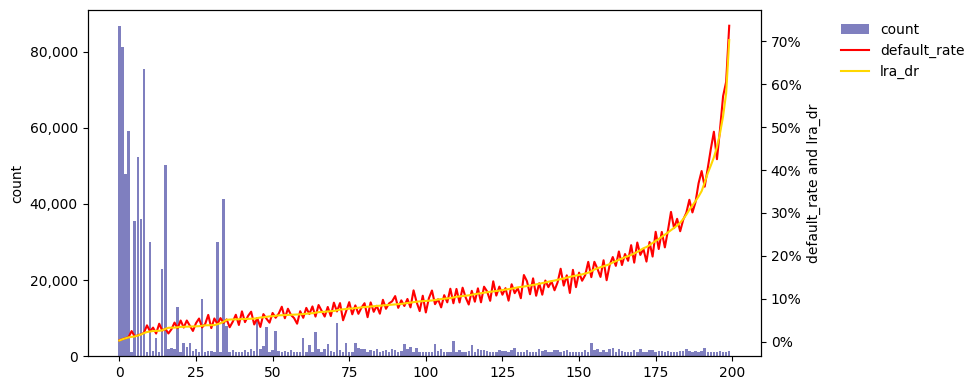

In [3]:
# Generate bins
optimal_binning = ob.BinningOptimizer()
df2, raw_df = optimal_binning.create_raw_bins(
    df, 
    n_bins=200,
    method="tree", # Options: ('tree', 'qcut', 'cut')
    min_samples_leaf=1000
)

# Get input data per bin
ut.plot_stats(df2)

### C. Create optimal bins

In [4]:
# Test solution
bins, _, _, iv, bin_data, excluded = optimal_binning.create_pools(min_bins=5,
                                                                  max_bins=20, 
                                                                  monotonical=True)

Total IV = 1.61, optimal solution


In [5]:
# Final solution
df_final = optimal_binning.get_dataframe()
df_final.head()

,x1,x2,year,target,score,bins,new_bin
0,0.958646,0.838719,2020,0,0.194613,164,14
1,-0.094752,-0.498360,2019,0,0.005142,1,1
2,1.552740,-0.543556,2015,0,0.092111,96,11
3,0.093803,-0.791283,2011,0,0.004804,1,1
4,0.259901,-0.520167,2010,0,0.009551,3,3


### D. Analyse the solution

In [6]:
drs = df_final.pivot_table(index='year', columns='new_bin', values='target', aggfunc='mean', margins='all').T
drs.style.format("{:.2%}")

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
new_bin,,,,,,,,,,,,,,
0,0.19%,0.18%,0.29%,0.28%,0.34%,0.30%,0.22%,0.34%,0.26%,0.25%,0.27%,0.39%,0.30%,0.28%
1,0.54%,0.53%,0.62%,0.57%,0.58%,0.68%,0.65%,0.51%,0.69%,0.57%,0.45%,0.50%,0.58%,0.57%
2,0.96%,0.73%,0.89%,0.77%,0.75%,0.71%,0.65%,0.76%,0.78%,0.86%,0.62%,0.72%,1.05%,0.79%
3,0.69%,1.14%,1.17%,0.96%,1.25%,0.93%,1.02%,1.33%,1.15%,0.93%,0.84%,0.96%,1.33%,1.05%
4,1.24%,1.76%,1.58%,1.33%,1.18%,1.53%,1.24%,1.41%,1.29%,1.65%,1.24%,1.30%,1.19%,1.38%
5,1.87%,1.88%,1.73%,2.11%,1.77%,1.94%,1.82%,1.87%,1.98%,2.22%,1.90%,1.85%,1.86%,1.91%
6,2.19%,2.82%,2.26%,2.80%,2.55%,2.46%,2.83%,2.47%,2.22%,2.59%,2.25%,2.55%,2.65%,2.51%
7,3.32%,3.02%,3.08%,3.21%,2.74%,3.23%,3.04%,2.82%,2.98%,2.85%,3.06%,3.14%,2.93%,3.03%
8,4.73%,4.24%,3.80%,4.30%,4.07%,4.14%,3.83%,3.89%,3.90%,4.42%,4.16%,4.01%,4.08%,4.12%


In [7]:
drs = df_final.pivot_table(index='year', columns='new_bin', values='target', aggfunc='count', margins='all').T
drs.style.format("{:,.0f}")

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
new_bin,,,,,,,,,,,,,,
0,"6,744","6,617","6,782","6,729","6,537","6,629","6,687","6,704","6,496","6,822","6,614","6,687","6,568","86,616"
1,"6,155","6,399","6,163","6,289","6,358","6,356","6,168","6,127","6,367","6,172","6,284","6,201","6,251","81,290"
2,"3,737","3,687","3,807","3,652","3,604","3,638","3,677","3,664","3,604","3,705","3,721","3,750","3,732","47,978"
3,"4,627","4,630","4,540","4,676","4,560","4,625","4,391","4,572","4,626","4,492","4,424","4,482","4,510","59,155"
4,"6,880","6,823","6,849","6,836","6,797","6,744","6,989","6,871","6,969","6,741","6,763","6,852","6,833","88,947"
5,"8,600","8,726","8,649","8,391","8,517","8,695","8,519","8,648","8,424","8,612","8,528","8,686","8,570","111,565"
6,"4,620","4,712","4,828","4,753","4,711","4,560","4,706","4,822","4,680","4,641","4,793","4,708","4,687","61,221"
7,"5,267","5,402","5,267","5,297","5,395","5,296","5,396","5,286","5,235","5,402","5,266","5,351","5,260","69,120"
8,"8,358","8,237","8,269","8,381","8,183","8,139","8,169","8,217","8,290","8,233","8,463","8,210","8,280","107,429"


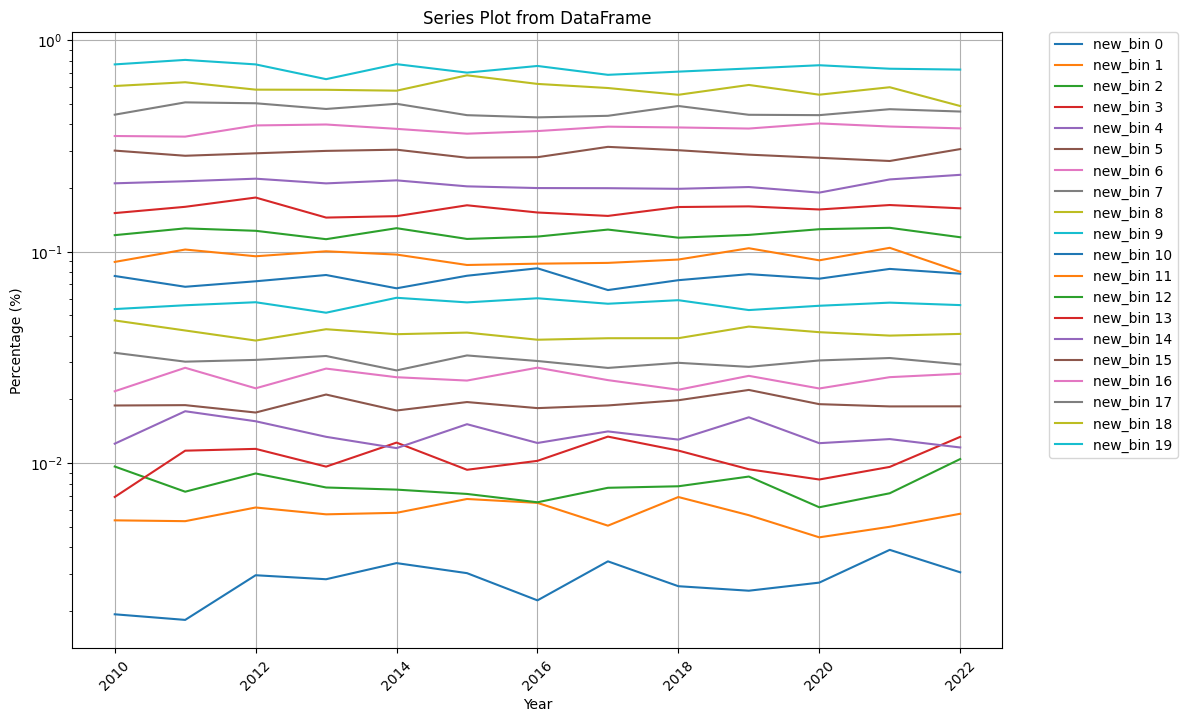

In [8]:
# Convert to DataFrame
df = df_final.pivot_table(index='year', columns='new_bin', values='target', aggfunc='mean')

# Plotting the DataFrame
plt.figure(figsize=(12, 8))

for row in df.columns:
    plt.plot(df.index, df[row], label=f'new_bin {row}')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Series Plot from DataFrame')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

# Show plot
plt.show()


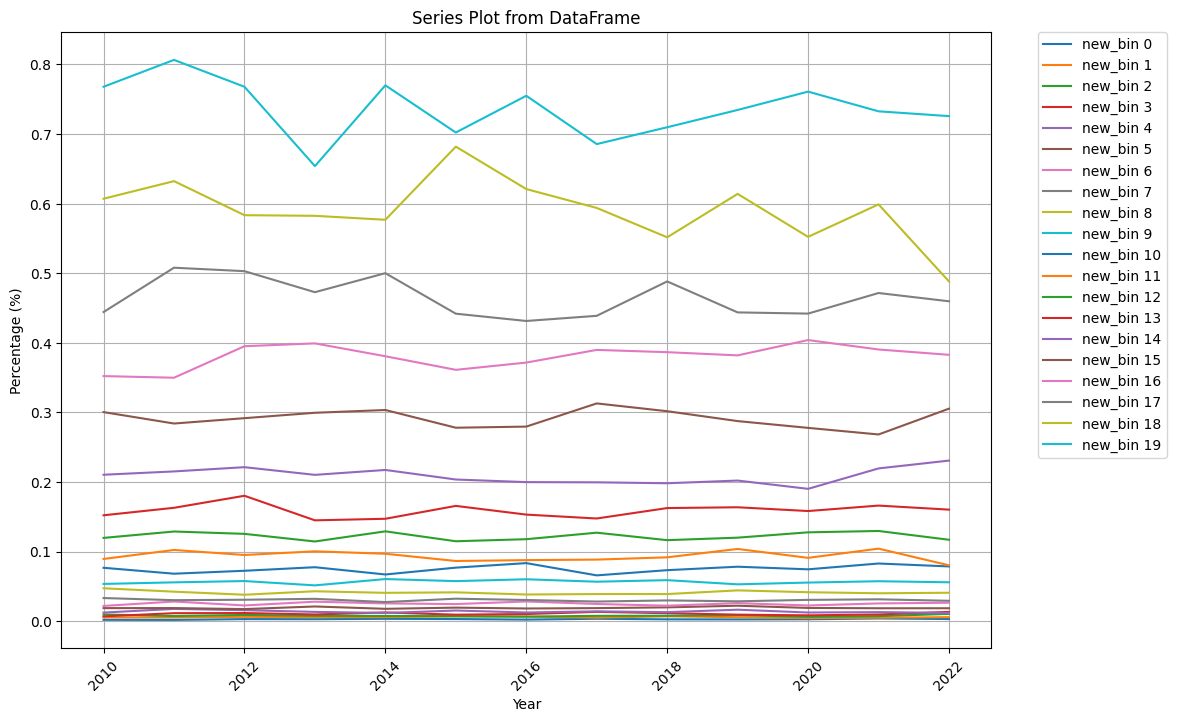

In [9]:
# Plotting the DataFrame
plt.figure(figsize=(12, 8))

for row in df.columns:
    plt.plot(df.index, df[row], label=f'new_bin {row}')

# Set y-axis to logarithmic scale
# plt.yscale('log')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Series Plot from DataFrame')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

# Show plot
plt.show()